In [1]:
import pymysql
import pandas as pd
import numpy as np

### 데이터 전처리
#### sql 초기화하기

In [2]:
db = pymysql.connect(host = 'localhost', user = 'root', password = 'tjfdkr7242', db = 'lahman2016')
cur = db.cursor()

#### 데이터 가져오기

In [3]:
Batting = pd.read_sql('''select Batting.playerID, Batting.yearID, Batting.teamID, Batting.lgID, Batting.G, AB, R, H, 2B, 3B, HR, RBI, Batting.SB, Batting.CS, BB, SO, IBB, HBP, SH, SF, GIDP, InnOuts, PO, A, E, DP, ZR, salary
                                    from Batting join Salaries on Batting.playerID = Salaries.playerID and
                                    Batting.yearID = Salaries.yearID
                                    join Fielding on Batting.playerID = Fielding.playerID and
                                    Batting.yearID = Fielding.yearID
                                    where Salaries.yearID > 1993''', db)

In [4]:
Batting.head()

,playerID,yearID,teamID,lgID,G,AB,R,H,2B,3B,...,SH,SF,GIDP,InnOuts,PO,A,E,DP,ZR,salary
0,abbotji01,1994,NYA,AL,24,0,0,0,0,0,...,0,0,0,481,8,23,1,1,,2775000
1,abbotku01,1994,FLO,NL,101,345,41,86,17,3,...,3,2,5,2476,162,260,15,61,,109000
2,acrema01,1994,OAK,AL,34,0,0,0,0,0,...,0,0,0,103,0,3,1,0,,109000
3,aguilri01,1994,MIN,AL,44,0,0,0,0,0,...,0,0,0,134,4,9,0,0,,3260000
4,aldremi01,1994,OAK,AL,76,178,23,43,5,0,...,0,3,2,552,171,14,1,15,,430000


In [5]:
Pitching = pd.read_sql('''select Pitching.playerID, Pitching.yearID, stint, Pitching.teamID, Pitching.lgID, W, L, G, GS, CG, SHO, SV, IPouts, H, ER, HR, BB, SO, BAOpp, ERA, IBB, WP, HBP, BK, BFP, GF, R, SH, SF, GIDP, salary
                                    from Pitching join Salaries on Pitching.playerID = Salaries.playerID and
                                    Pitching.yearID = Salaries.yearID
                                    where Salaries.yearID > 1993''', db)

In [6]:
Pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,abbotji01,1994,1,NYA,AL,9,8,24,24,2,...,8,2,1,692,0,88,,,,2775000
1,acrema01,1994,1,OAK,AL,5,1,34,0,0,...,1,1,0,147,6,13,,,,109000
2,aguilri01,1994,1,MIN,AL,1,4,44,0,0,...,2,0,0,201,40,23,,,,3260000
3,alvarwi01,1994,1,CHA,AL,12,8,24,24,2,...,3,0,0,682,0,72,,,,285000
4,anderbr02,1994,1,CAL,AL,7,5,18,18,0,...,5,5,5,441,0,63,,,,120000


In [7]:
Fielding = pd.read_sql('select * from Fielding where yearID > 1993', db)

In [8]:
Fielding.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
0,abbotji01,1994,1,NYA,AL,P,24,24,481,8,23,1,1,,,,,
1,abbotku01,1994,1,FLO,NL,SS,99,93,2476,162,260,15,61,,,,,
2,acrema01,1994,1,OAK,AL,P,34,0,103,0,3,1,0,,,,,
3,aguilri01,1994,1,MIN,AL,P,44,0,134,4,9,0,0,,,,,
4,aldremi01,1994,1,OAK,AL,1B,27,20,552,171,14,1,15,,,,,


In [9]:
Teams = pd.read_sql('''select yearID, lgID, teamID, Rank, DivWin, attendance
                                from Teams where yearID > 1993''', db)

In [10]:
Teams.head()

,yearID,lgID,teamID,Rank,DivWin,attendance
0,1994,NL,ATL,2,,2539240
1,1994,AL,BAL,2,,2535359
2,1994,AL,BOS,4,,1775818
3,1994,AL,CAL,4,,1512622
4,1994,AL,CHA,1,,1697398


#### Featrue 정규화, 결측치 처리

In [11]:
from sklearn.preprocessing import minmax_scale, FunctionTransformer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

##### 투수 전처리

In [12]:
Pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10328 entries, 0 to 10327
Data columns (total 31 columns):
playerID    10328 non-null object
yearID      10328 non-null int64
stint       10328 non-null int64
teamID      10328 non-null object
lgID        10328 non-null object
W           10328 non-null int64
L           10328 non-null int64
G           10328 non-null int64
GS          10328 non-null int64
CG          10328 non-null int64
SHO         10328 non-null int64
SV          10328 non-null int64
IPouts      10328 non-null int64
H           10328 non-null int64
ER          10328 non-null int64
HR          10328 non-null int64
BB          10328 non-null int64
SO          10328 non-null int64
BAOpp       10328 non-null object
ERA         10328 non-null float64
IBB         10328 non-null object
WP          10328 non-null object
HBP         10328 non-null object
BK          10328 non-null int64
BFP         10328 non-null object
GF          10328 non-null object
R           10328 non-

In [13]:
for colname, type in dict(Pitching.loc[:, 'G':'GIDP'].dtypes).items() :
    if type == 'object' :
        Pitching[colname].replace(to_replace = '', value = 0, inplace = True)
        Pitching[colname] = Pitching[colname].astype(np.float32)

In [14]:
for col in Pitching.columns :
    print(col, sum(Pitching[col] == 0))

playerID 0
yearID 0
stint 0
teamID 0
lgID 0
W 1909
L 1514
G 0
GS 5355
CG 8394
SHO 9251
SV 7563
IPouts 7
H 72
ER 165
HR 619
BB 152
SO 182
BAOpp 1118
ERA 169
IBB 2622
WP 2180
HBP 2204
BK 8066
BFP 0
GF 3515
R 161
SH 4640
SF 4643
GIDP 3734
salary 0


In [15]:
Pitching_numeric = Pitching.loc[:, 'G':'salary']
Pitching_numeric_scaled = minmax_scale(Pitching_numeric)
Pitching_numeric_scaled = pd.DataFrame(Pitching_numeric_scaled, index = Pitching_numeric.index, columns = Pitching_numeric.columns)

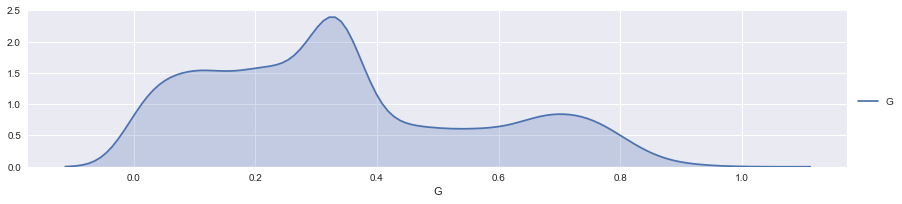

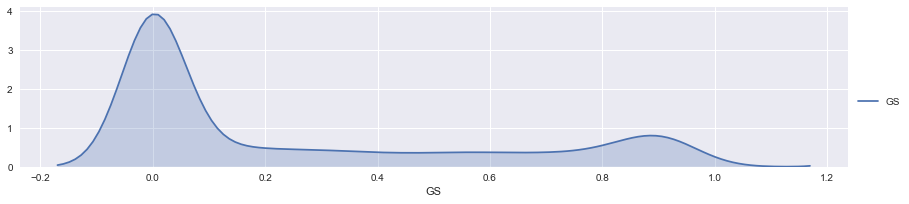

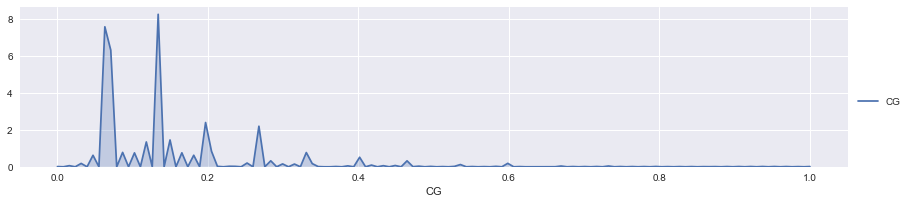

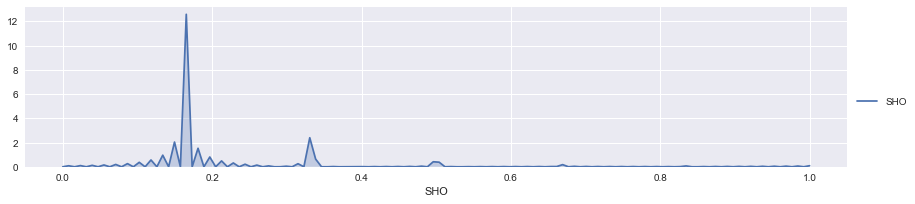

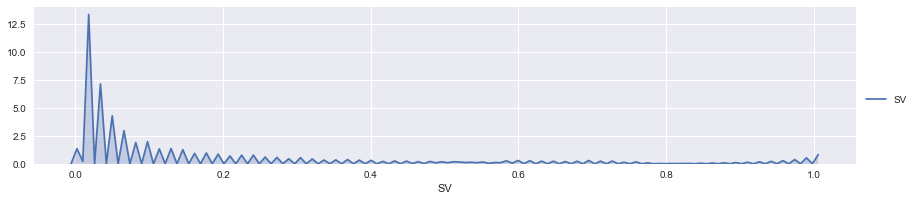

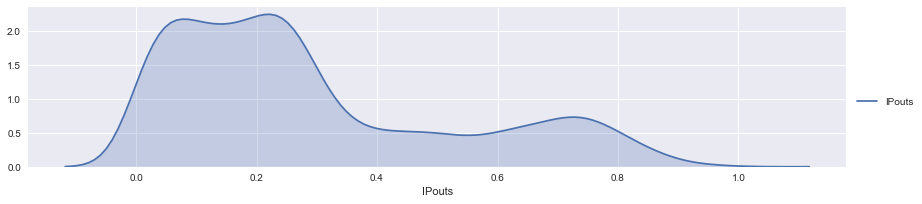

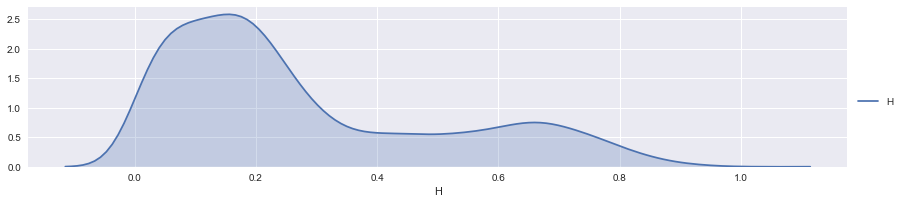

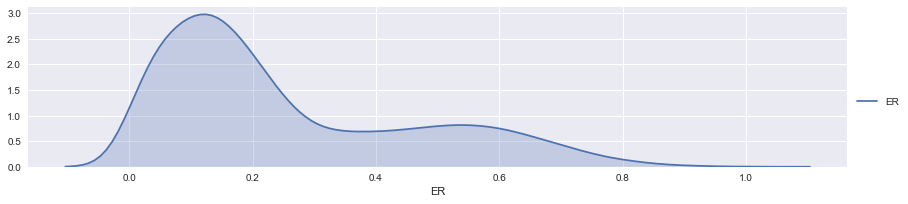

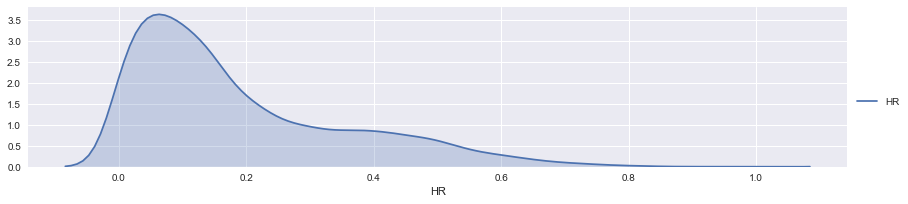

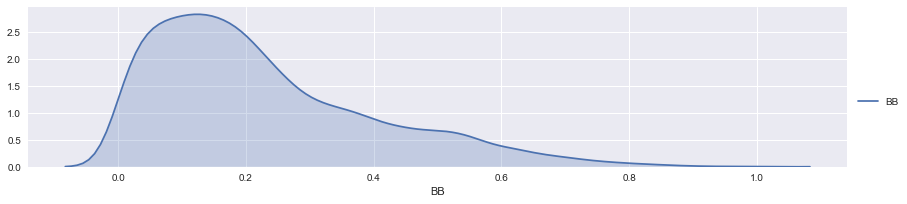

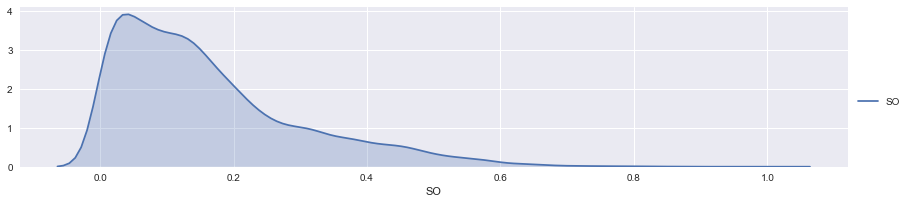

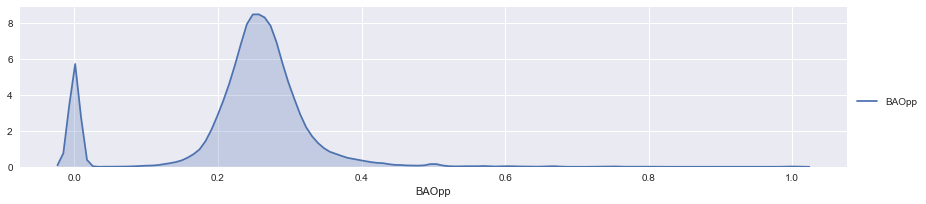

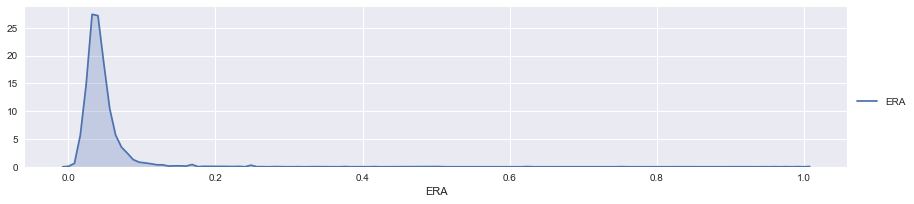

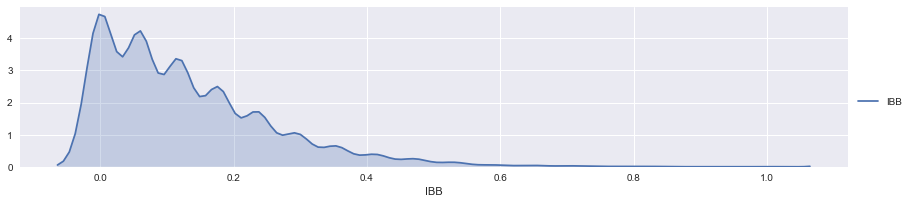

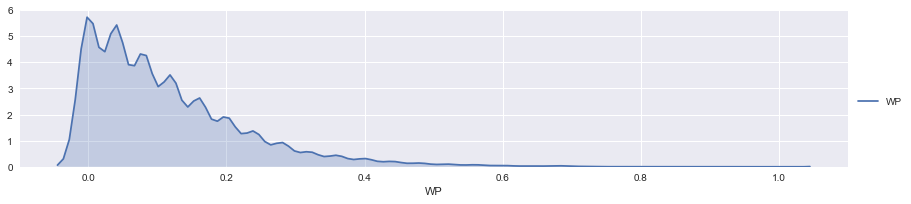

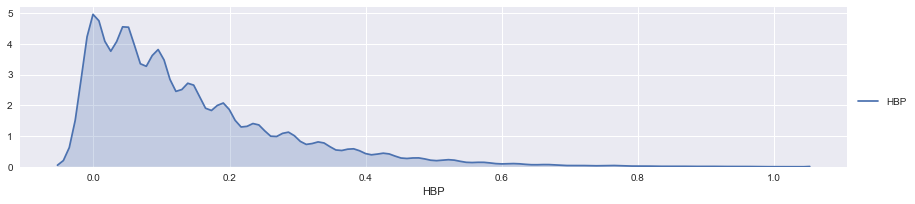

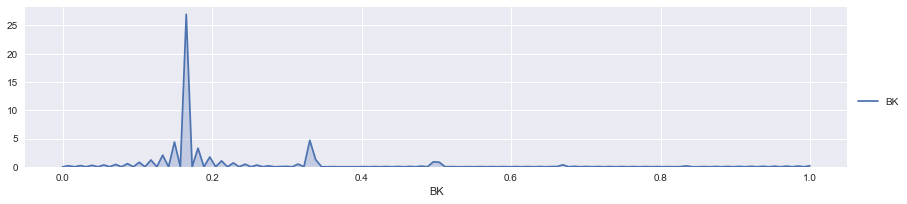

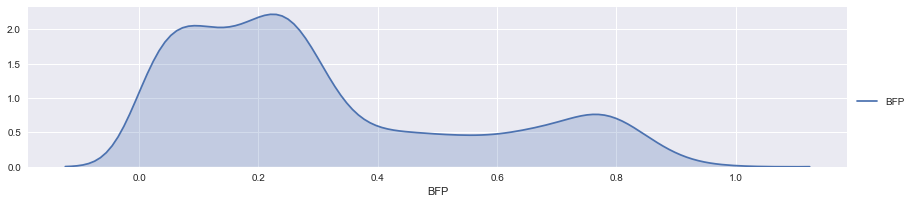

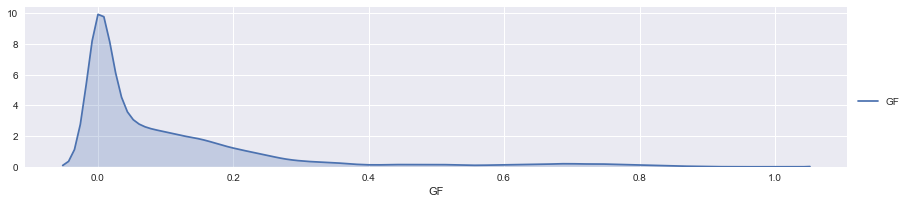

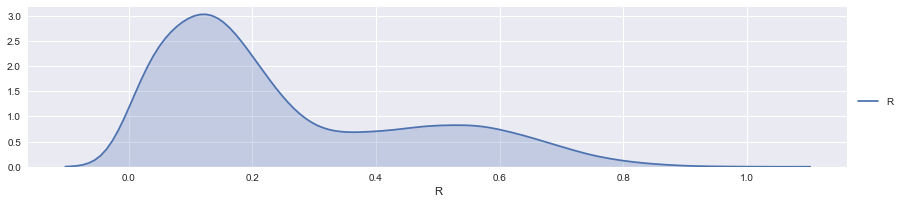

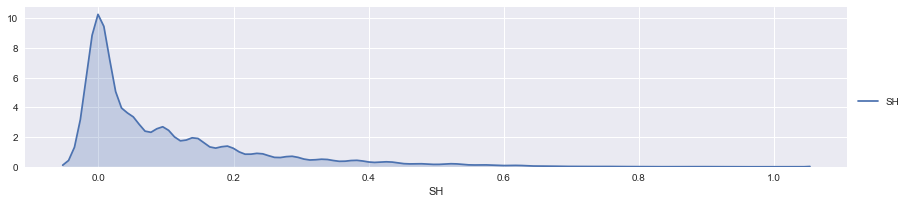

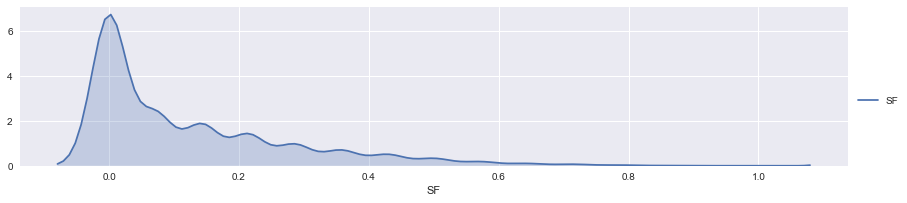

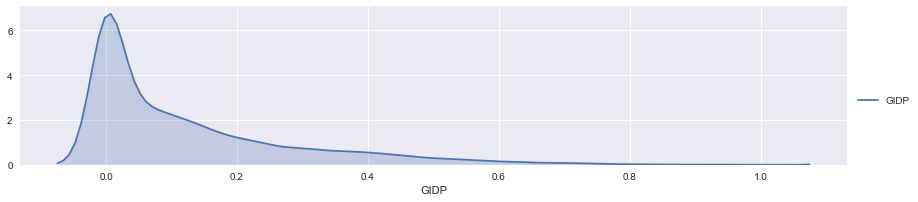

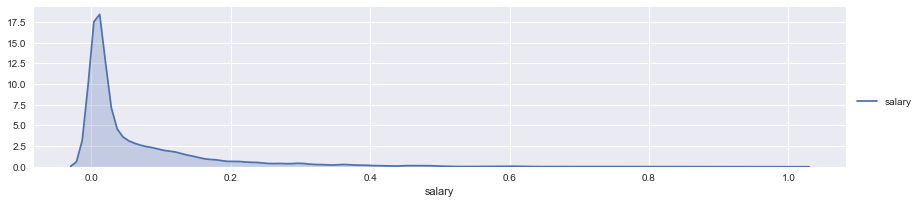

In [16]:
for column in Pitching_numeric_scaled.columns :
    sns.FacetGrid(Pitching_numeric_scaled, aspect = 4).map(sns.kdeplot, column, shade = True).add_legend()
    plt.show()

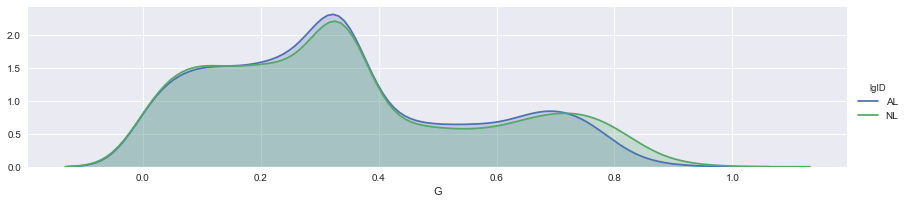

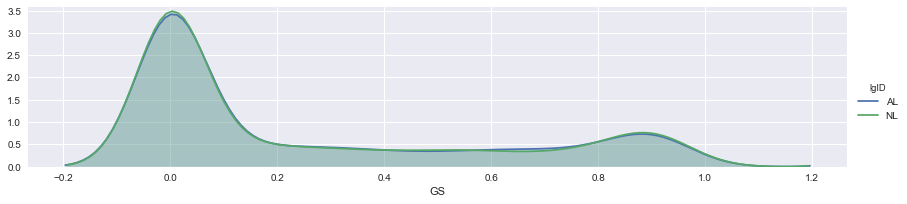

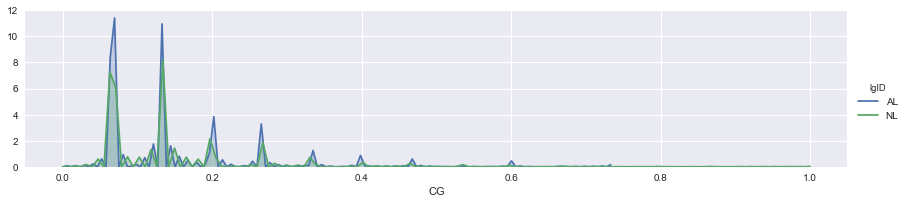

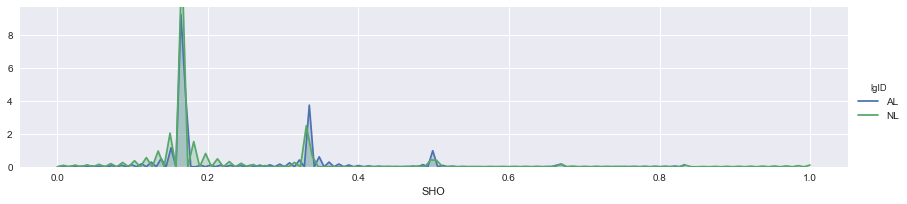

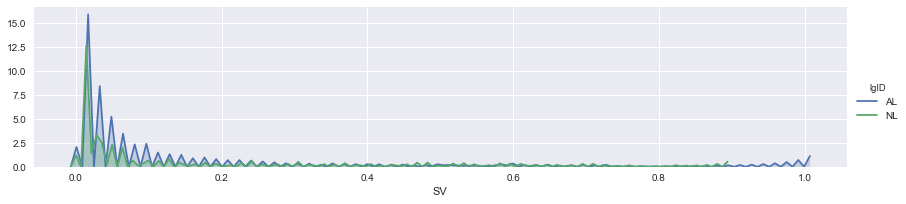

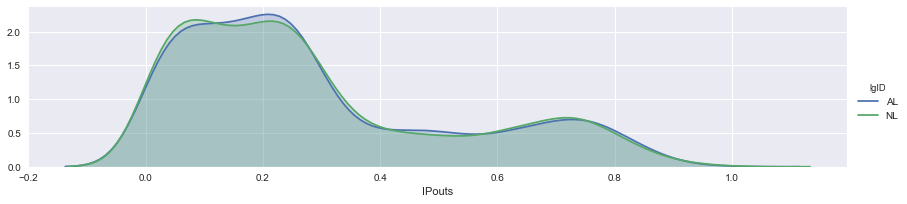

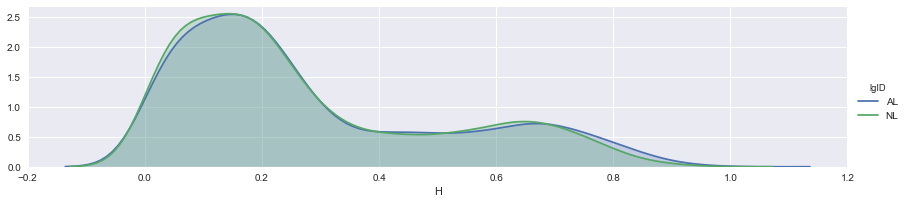

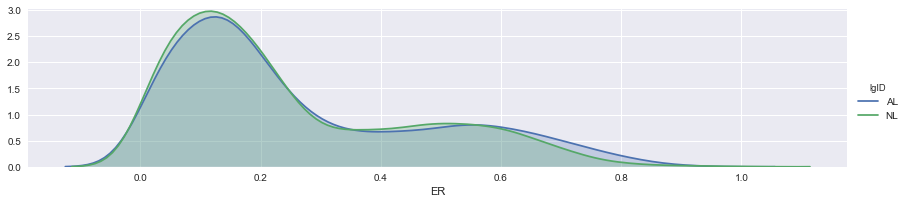

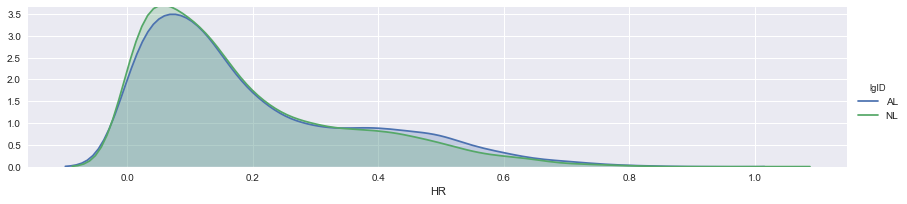

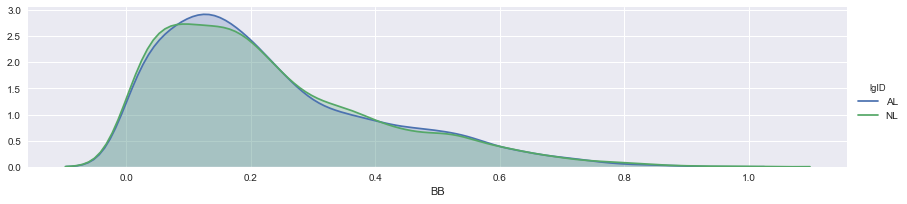

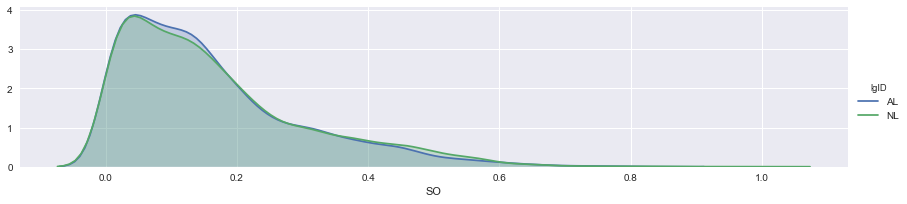

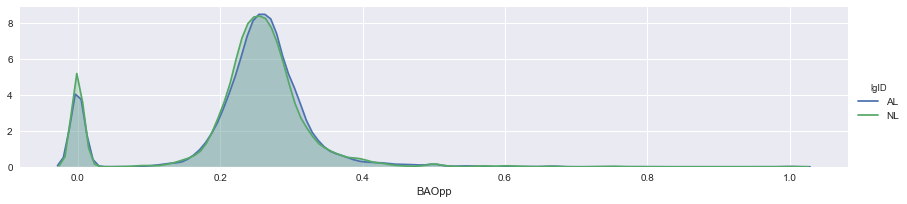

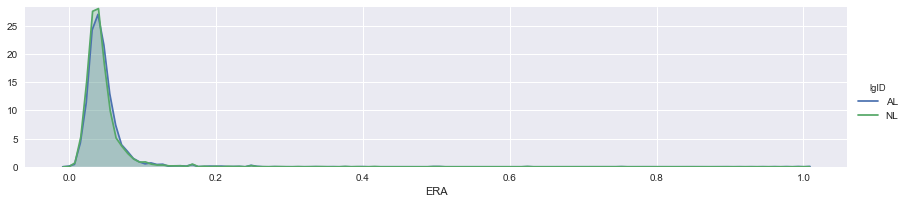

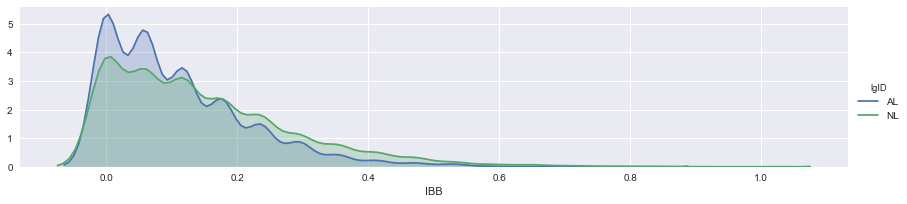

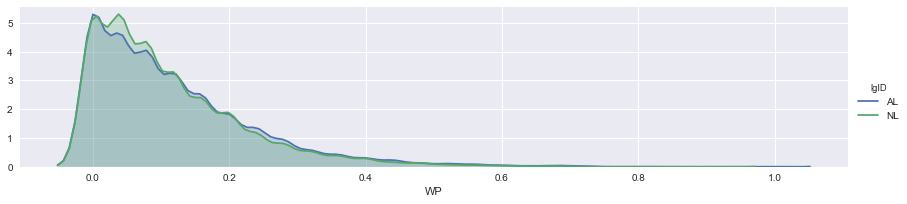

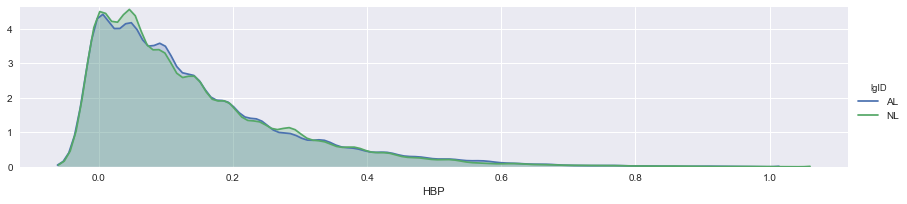

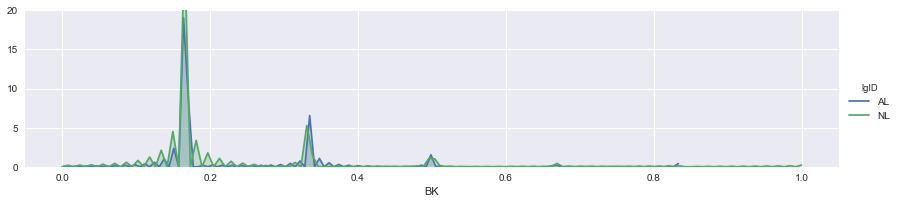

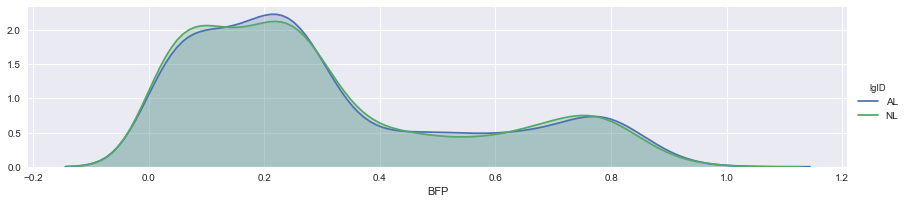

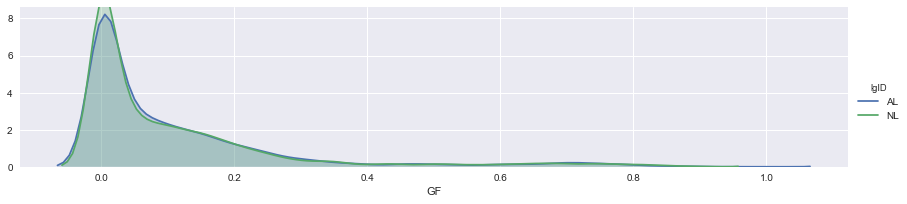

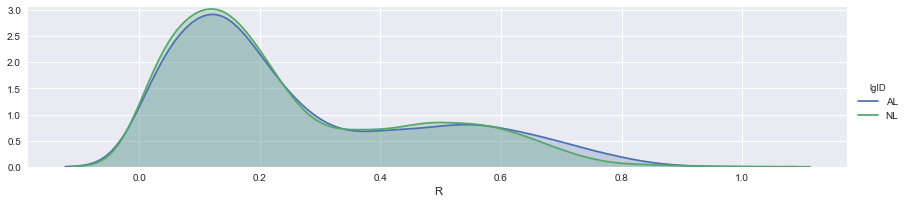

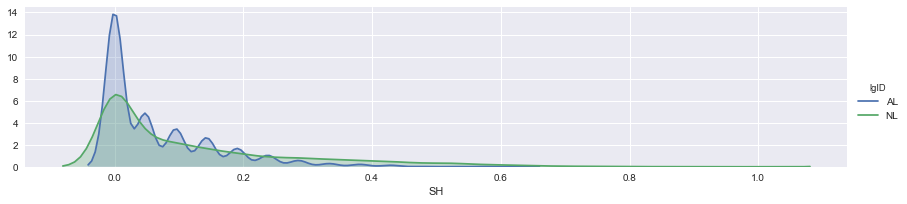

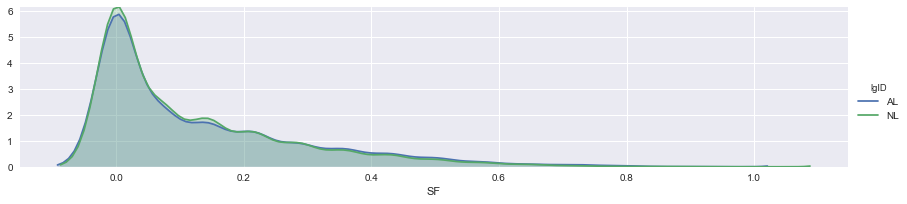

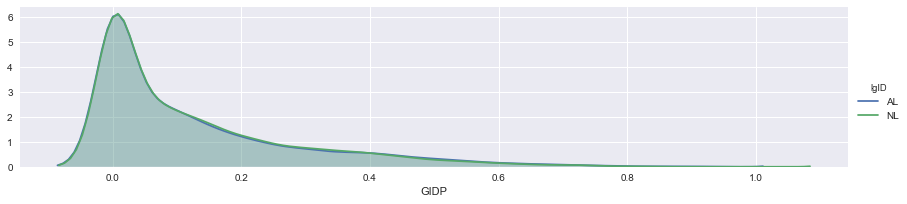

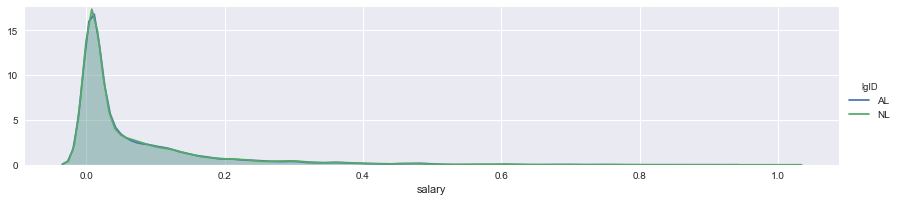

In [17]:
temp = Pitching
temp.loc[:, 'G':'salary'] = Pitching_numeric_scaled
for column in Pitching_numeric_scaled.columns :
    sns.FacetGrid(temp, hue = 'lgID', aspect = 4).map(sns.kdeplot, column, shade = True).add_legend()
    plt.show()

In [18]:
Pitching_numeric_scaled = temp
del temp

##### 타자 전처리

In [19]:
Batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34023 entries, 0 to 34022
Data columns (total 28 columns):
playerID    34023 non-null object
yearID      34023 non-null int64
teamID      34023 non-null object
lgID        34023 non-null object
G           34023 non-null int64
AB          34023 non-null int64
R           34023 non-null int64
H           34023 non-null int64
2B          34023 non-null int64
3B          34023 non-null int64
HR          34023 non-null int64
RBI         34023 non-null int64
SB          34023 non-null int64
CS          34023 non-null int64
BB          34023 non-null int64
SO          34023 non-null int64
IBB         34023 non-null object
HBP         34023 non-null object
SH          34023 non-null object
SF          34023 non-null object
GIDP        34023 non-null object
InnOuts     34023 non-null object
PO          34023 non-null int64
A           34023 non-null int64
E           34023 non-null int64
DP          34023 non-null int64
ZR          34023 non-nu

In [20]:
for colname, type in dict(Batting.loc[:, 'G':'salary'].dtypes).items() :
    if type == 'object' :
        Batting[colname].replace(to_replace = '', value = 0, inplace = True)
        Batting[colname] = Batting[colname].astype(np.float32)

In [21]:
for col in Batting.columns :
    print(col, sum(Batting[col] == 0))       # ZR : 수비율(지명타자 + 포수)

playerID 0
yearID 0
teamID 0
lgID 0
G 0
AB 6153
R 10398
H 9284
2B 12385
3B 21729
HR 15561
RBI 11008
SB 19349
CS 20611
BB 11041
SO 7302
IBB 22342
HBP 18730
SH 19324
SF 18280
GIDP 13741
InnOuts 62
PO 3910
A 4912
E 15607
DP 14896
ZR 33838
salary 0


In [22]:
Batting = Batting.drop(Batting.index[Batting['AB'] == 0])    # 타석에 들어선 적이 없는 선수들 제거(투수)

In [23]:
Batting_numeric = Batting.loc[:, 'G':'salary']
Batting_numeric_scaled = minmax_scale(Batting_numeric)
Batting_numeric_scaled = pd.DataFrame(Batting_numeric_scaled, index = Batting_numeric.index, columns = Batting_numeric.columns)

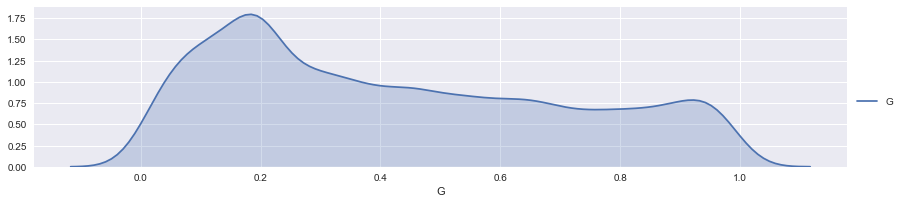

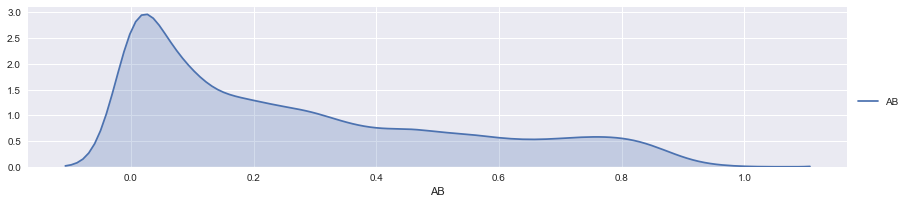

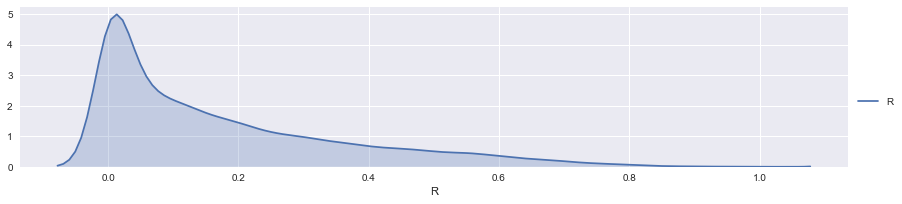

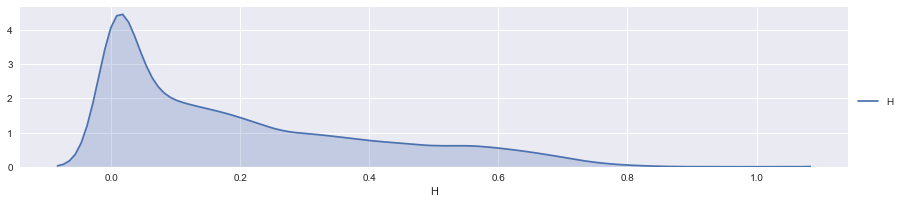

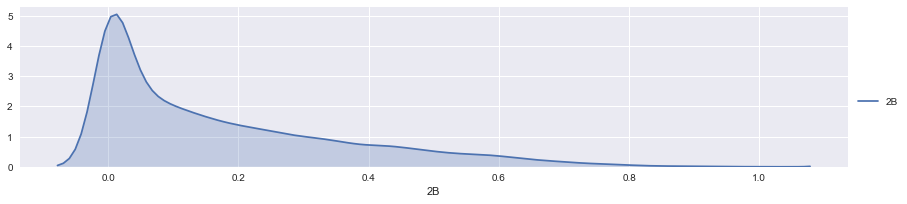

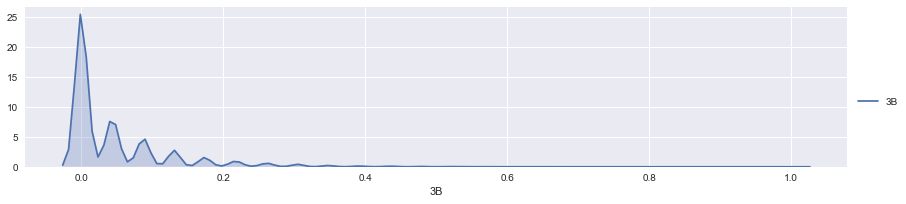

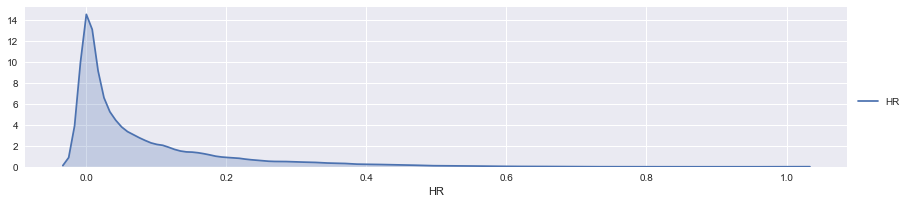

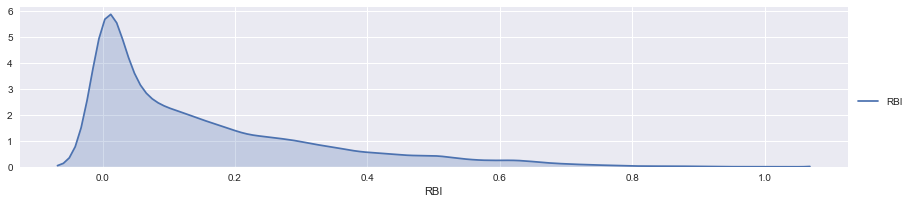

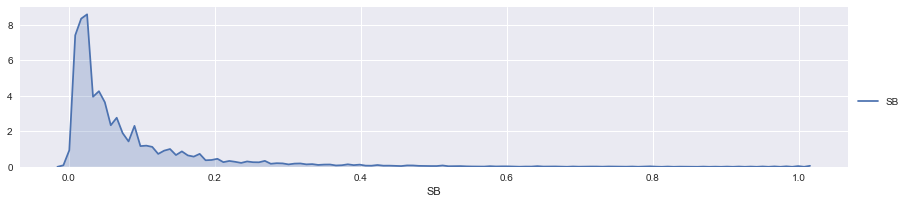

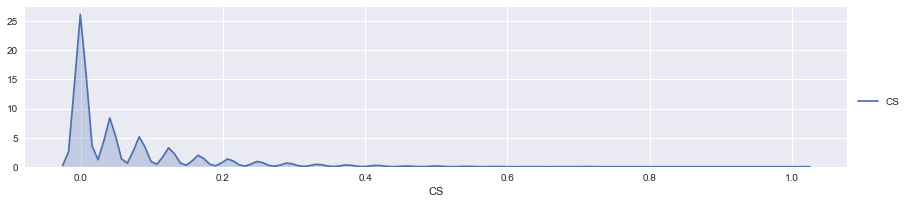

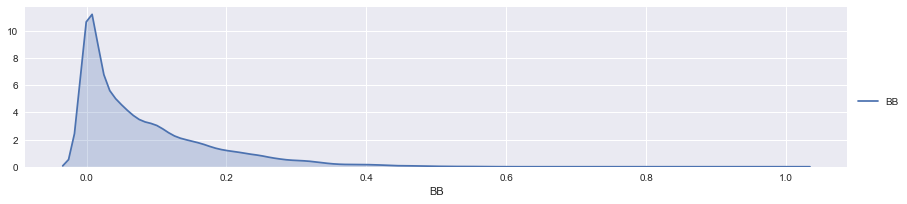

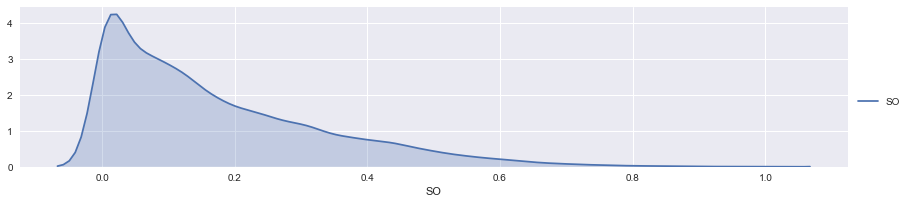

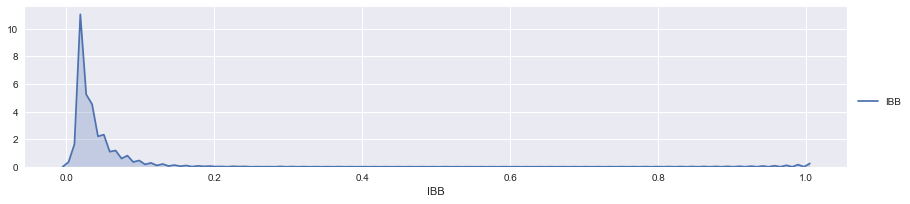

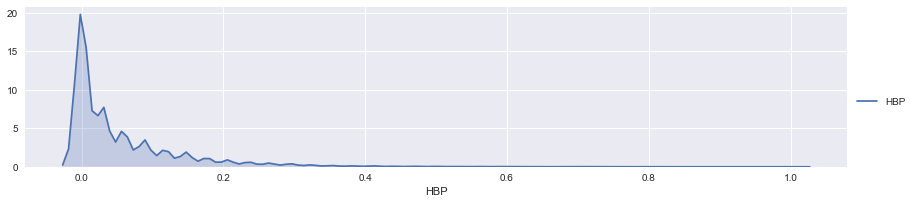

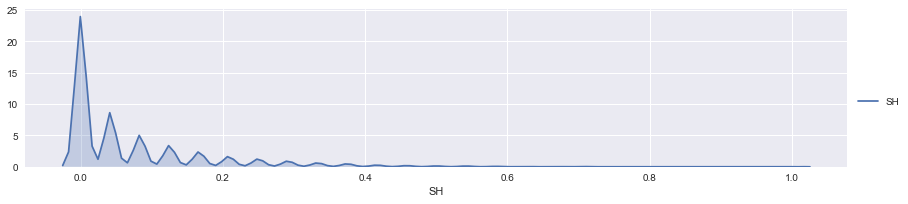

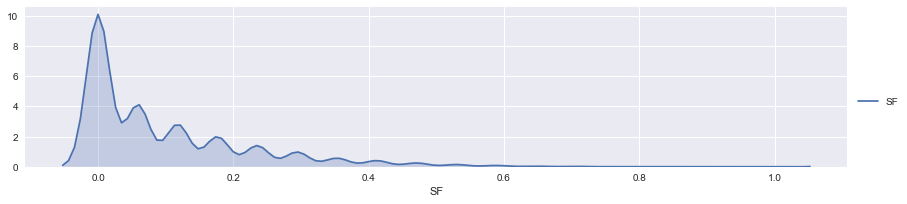

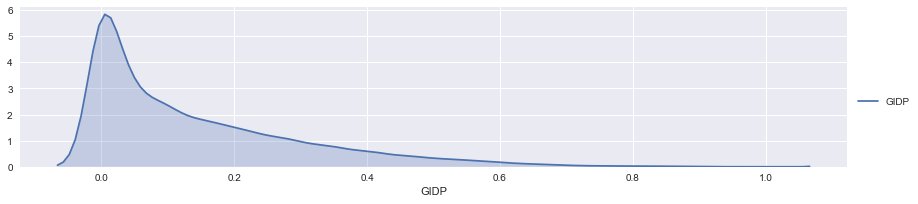

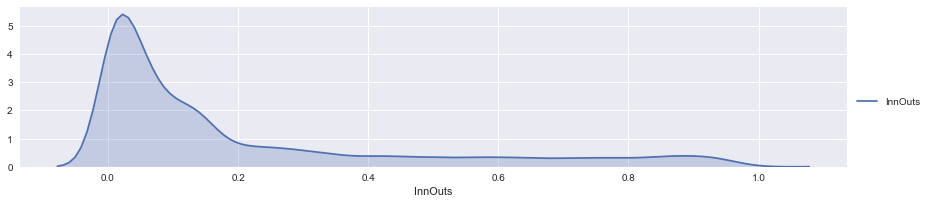

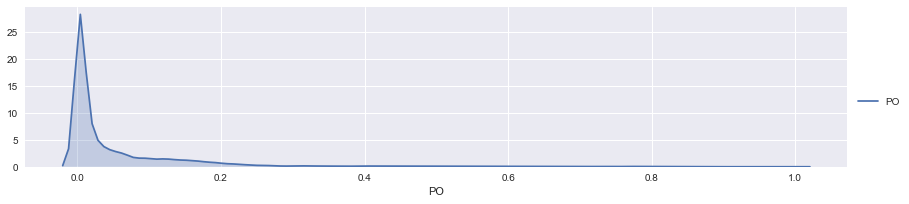

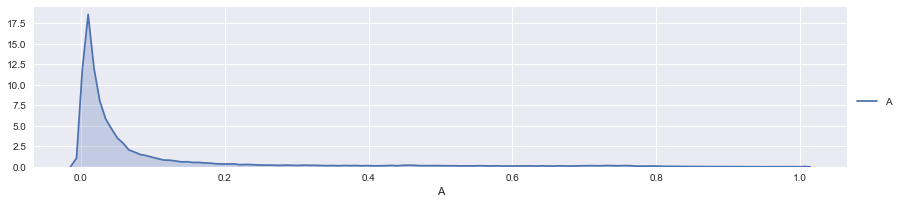

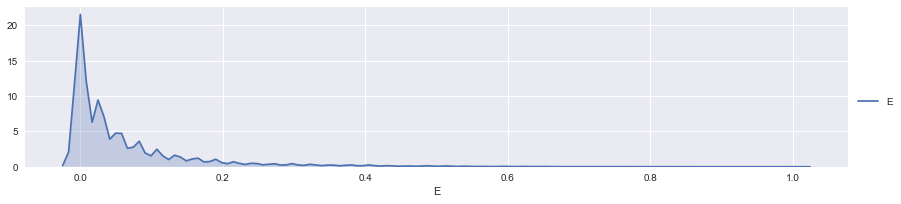

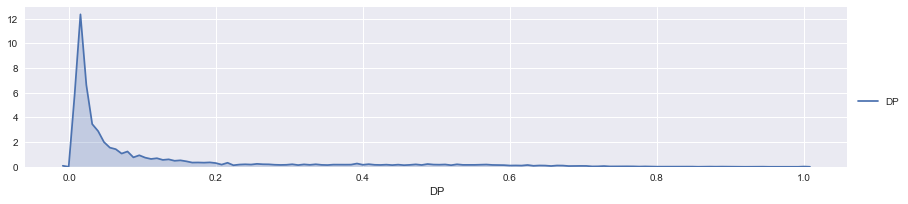

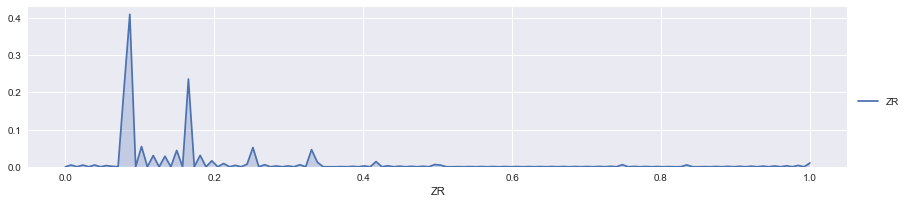

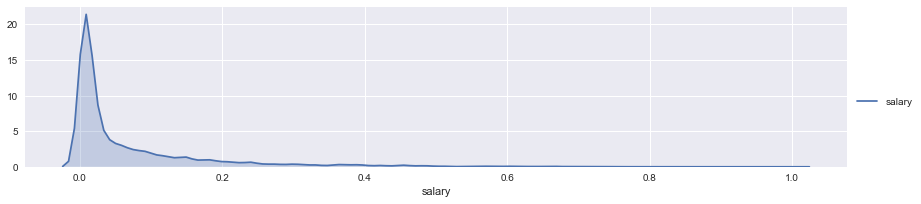

In [24]:
for column in Batting_numeric_scaled.columns :
    sns.FacetGrid(Batting_numeric_scaled, aspect = 4).map(sns.kdeplot, column, shade = True).add_legend()
    plt.show()

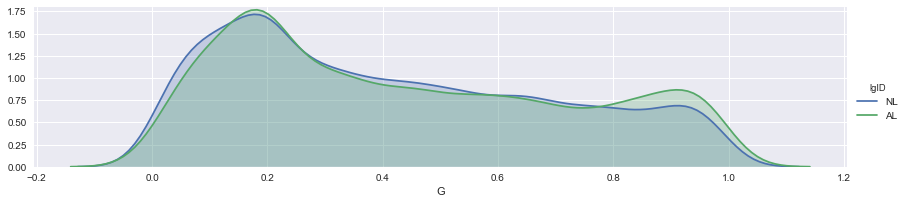

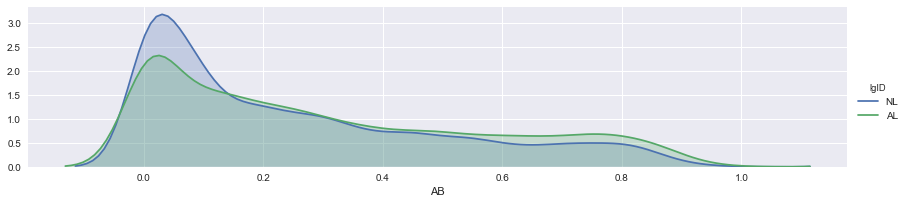

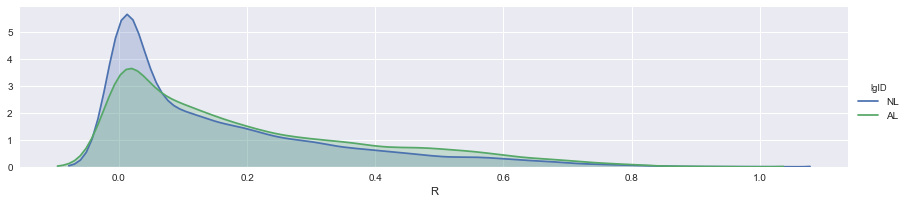

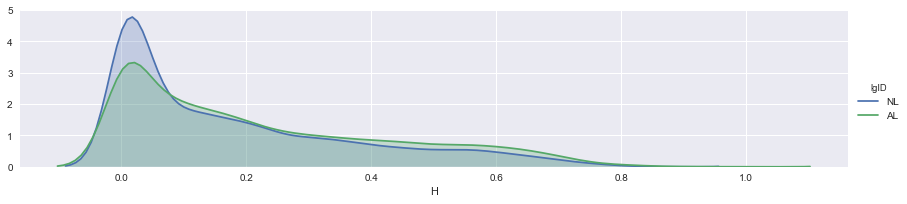

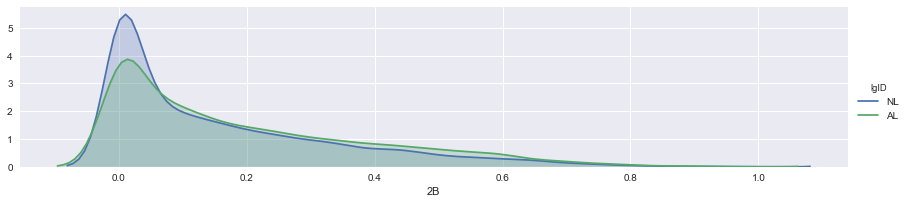

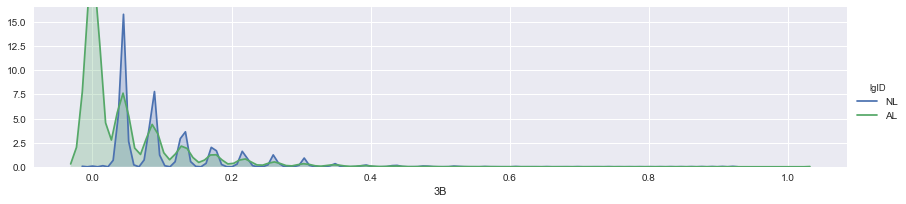

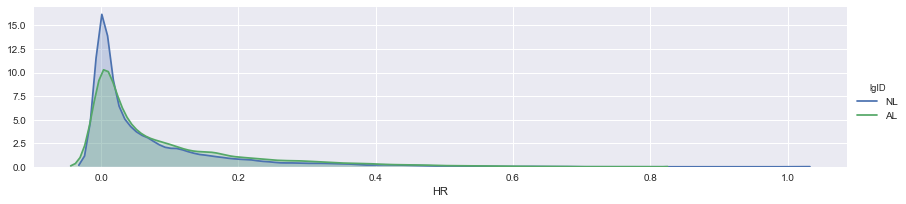

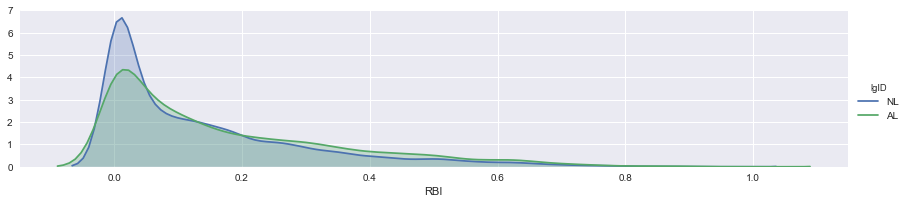

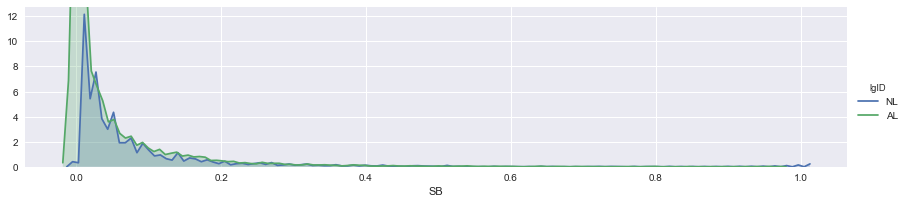

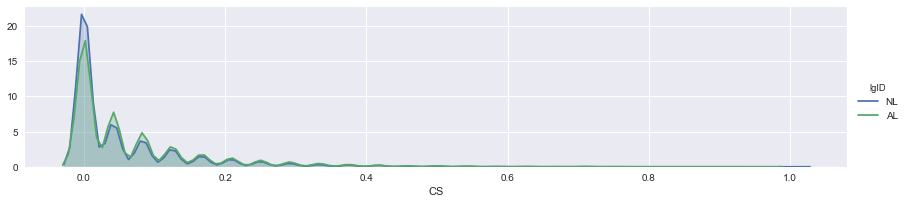

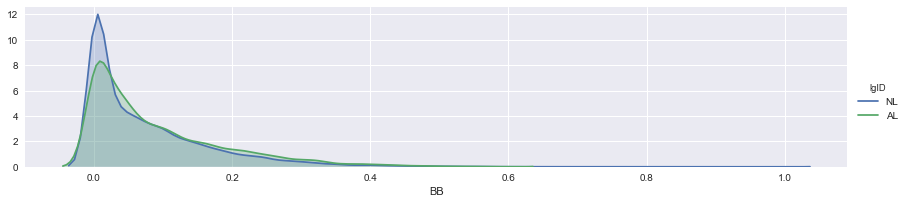

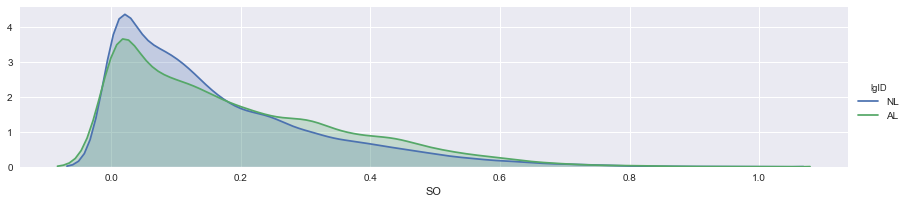

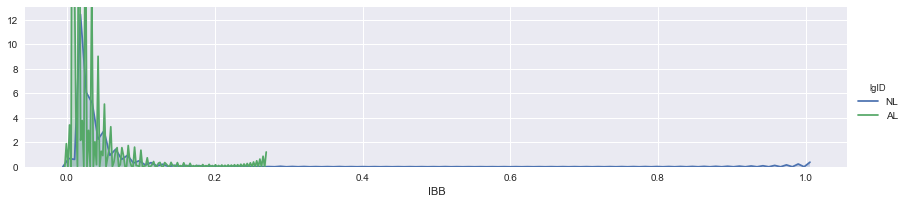

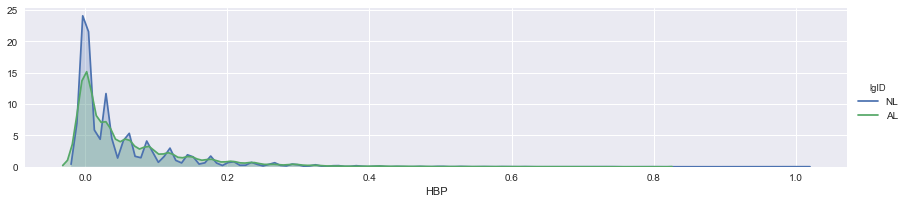

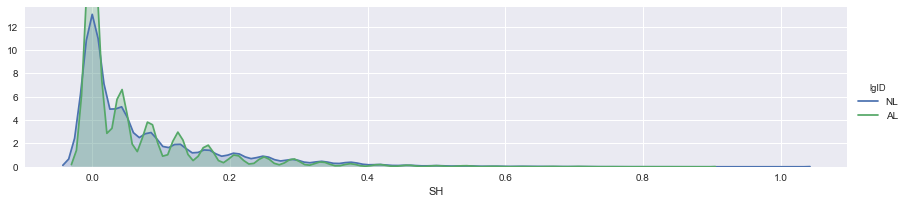

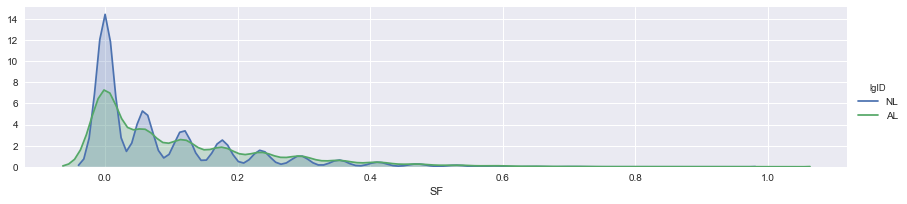

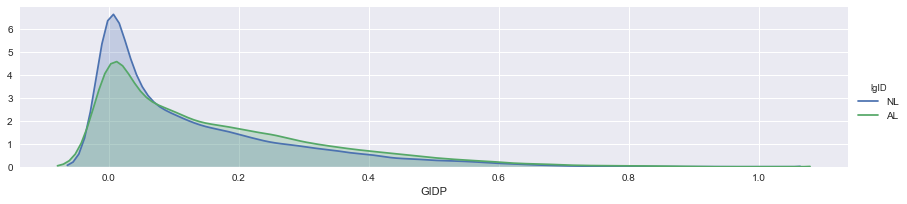

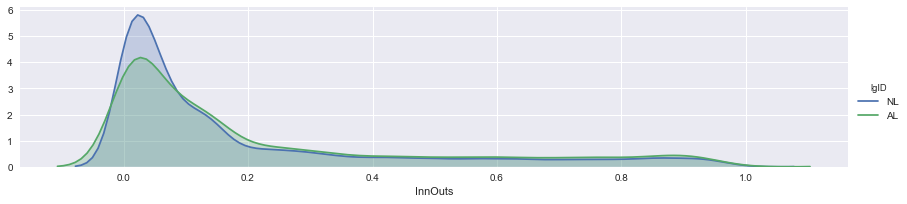

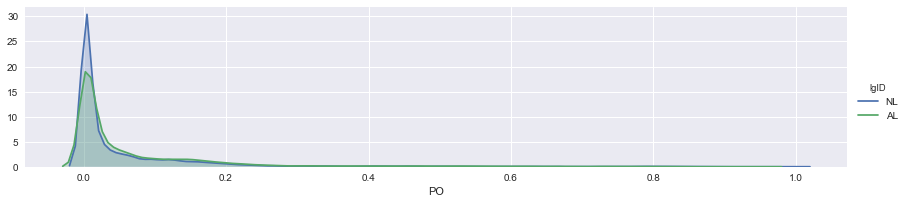

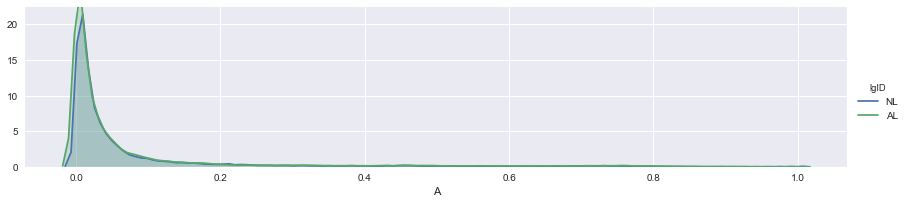

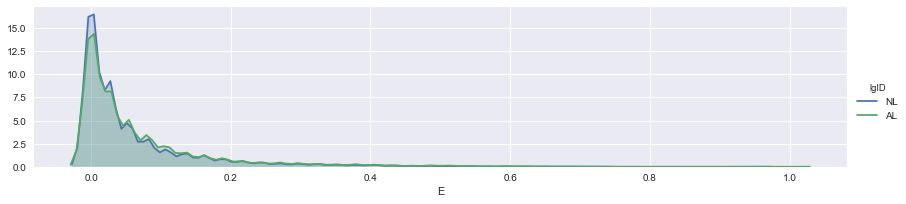

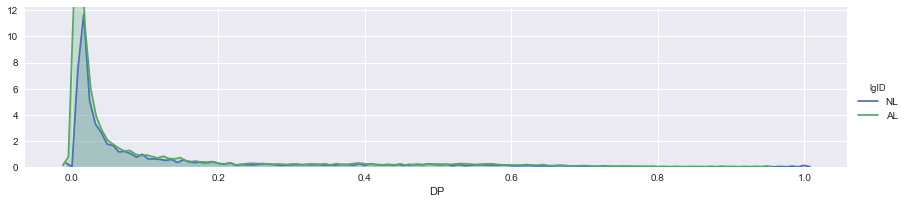

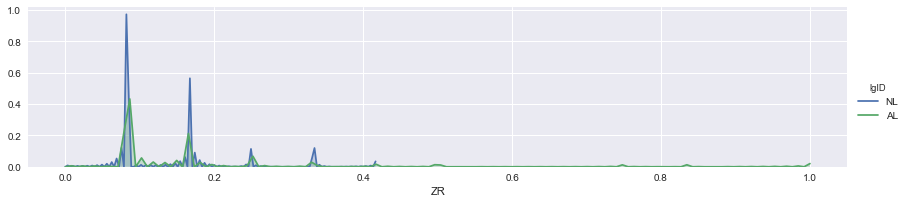

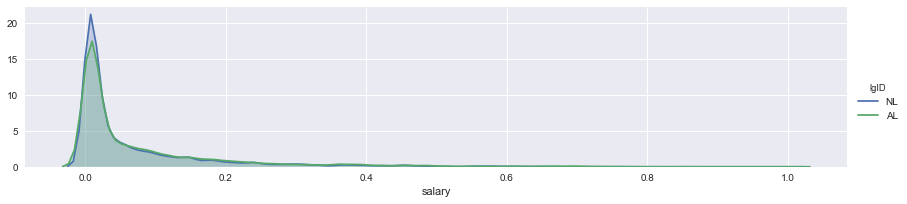

In [25]:
temp = Batting
temp.loc[:, 'G':'salary'] = Batting_numeric_scaled
for column in Batting_numeric_scaled.columns :
    sns.FacetGrid(temp, hue = 'lgID', aspect = 4).map(sns.kdeplot, column, shade = True).add_legend()
    plt.show()

In [26]:
Batting_numeric_scaled = temp
del temp

#### 팀 전처리

In [27]:
Teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 6 columns):
yearID        682 non-null int64
lgID          682 non-null object
teamID        682 non-null object
Rank          682 non-null int64
DivWin        682 non-null object
attendance    682 non-null object
dtypes: int64(2), object(4)
memory usage: 32.0+ KB


In [28]:
Teams['attendance'] = Teams['attendance'].astype(np.float32)
Teams['attendance'] = minmax_scale(Teams['attendance'])

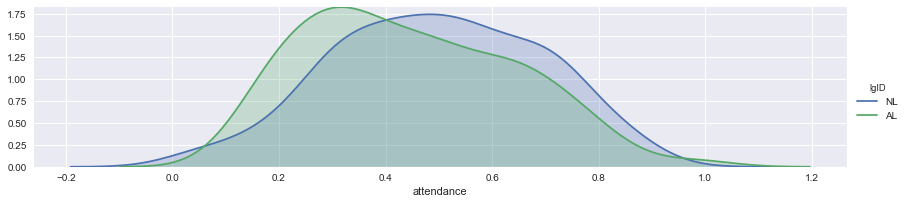

In [29]:
sns.FacetGrid(Teams, hue = 'lgID', aspect = 4).map(sns.kdeplot, 'attendance', shade = True).add_legend()    #관객은 내셔널 리그가 약간 더 많음

#### AL, NL 나누기

In [30]:
Pitching['lgID'].unique()

array(['AL', 'NL'], dtype=object)

In [31]:
Pitching_AL = Pitching[Pitching['lgID'] == 'AL']
Pitching_NL = Pitching[Pitching['lgID'] == 'NL']
print(Pitching_AL.shape)
print(Pitching_NL.shape)

(4884, 31)
(5444, 31)


In [32]:
Fielding_AL = Fielding[Fielding['lgID'] == 'AL']
Fielding_NL = Fielding[Fielding['lgID'] == 'NL']
Batting_AL = Batting[Batting['lgID'] == 'AL']
Batting_NL = Batting[Batting['lgID'] == 'NL']
print(Fielding_AL.shape, Batting_AL.shape)
print(Fielding_NL.shape, Batting_NL.shape)

(18993, 18) (11905, 28)
(20886, 18) (15965, 28)


AL : 지명타자가 있고 투수는 공격에 참가하지 않음  
NL : 지명타자가 없고 투수도 타석에 들어서야 함

In [33]:
Teams_AL = Teams[Teams['lgID'] == 'AL']
Teams_NL = Teams[Teams['lgID'] == 'NL']

### 선수들의 유형은? (군집분석)

In [34]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.decomposition import PCA

#### 투수 분석

In [35]:
for i in range(2, 10) :
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(Pitching_numeric_scaled.loc[:, 'W':'GIDP'])
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(Pitching_numeric_scaled.loc[:, 'W':'salary'], labels, metric='euclidean'))

0.600485289749
0.448290174498
0.418495404394
0.413194016915
0.407734848196
0.380084113045
0.37365674642
0.378675661896


적절하게 군집화가 이루어지지 않는 것처럼 보인다 -> PCA(차원축소)

In [36]:
pca = PCA(n_components=10)
pca.fit(Pitching_numeric_scaled.loc[:, 'G':'GIDP'])
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3) * 100)
print(cum_var)

[ 66.6  78.9  83.4  86.2  88.1  89.8  91.4  92.9  94.3  95.5]


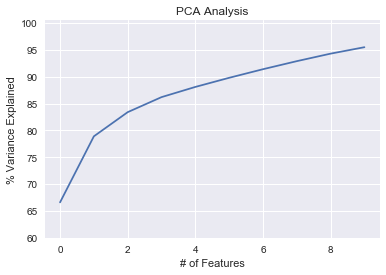

In [37]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(60,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(cum_var)

In [38]:
pca = PCA(n_components=2)
pca.fit(Pitching_numeric_scaled.loc[:, 'G':'GIDP'])
with pd.option_context('display.max_columns', None):
    display(pd.DataFrame(pca.components_, columns = Pitching_numeric_scaled.loc[:, 'G':'GIDP'].columns))

,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,0.026541,0.477937,0.060004,0.053760,-0.029381,0.342186,0.331030,0.294682,0.223185,0.229591,0.181200,-0.003555,-0.008246,0.061621,0.098916,0.150617,0.049980,0.358475,-0.070196,0.290474,0.116805,0.137365,0.159645
1,0.727525,-0.261297,-0.025547,-0.022789,0.287980,0.087102,0.033474,-0.005910,-0.008330,0.079265,0.094112,-0.057433,-0.038036,0.196731,0.068311,0.043646,0.006386,0.082337,0.477737,-0.002983,0.060239,0.052842,0.053598


첫 번째 주성분 : 선발투수 자격요건(많은 이닝 소화 가능)  
두 번째 주성분 : 계투 및 마무리 투수 자격요건(많은 경기 출장, 마무리 담당)  

-----------------------------------------------------------------------
##### 세이브 수, 완봉 등과 같은 투수의 position을 짐작할 수 있는 데이터는 제외하고 분석

In [39]:
pca = PCA(n_components=10)
pca.fit(Pitching_numeric_scaled.loc[:, 'IPouts':'GIDP'].drop('GF', axis = 1))
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3) * 100)
print(cum_var)

[ 74.5  81.   84.4  87.   89.3  91.5  93.5  95.2  96.6  97.9]


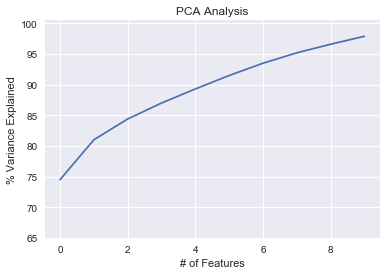

In [40]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(65,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(cum_var)

In [41]:
pca = PCA(n_components=3)
pca.fit(Pitching_numeric_scaled.loc[:, 'IPouts':'GIDP'].drop('GF', axis = 1))
with pd.option_context('display.max_columns', None):
    display(pd.DataFrame(pca.components_, columns = Pitching_numeric_scaled.loc[:, 'IPouts':'GIDP'].drop('GF', axis = 1).columns))

,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,R,SH,SF,GIDP
0,0.391327,0.378209,0.336998,0.255009,0.265324,0.208230,-0.004964,-0.010481,0.079482,0.116251,0.174729,0.057416,0.410256,0.332225,0.136447,0.161290,0.185362
1,0.077297,0.074735,0.114197,0.107201,0.127632,0.052630,-0.271179,-0.003184,-0.044004,0.076015,-0.002395,0.087330,0.090301,0.114120,-0.452453,-0.587501,-0.533763
2,0.038806,-0.109223,-0.191000,-0.263546,0.232457,0.129788,-0.187712,-0.069366,0.796391,0.192379,0.099281,0.107509,0.029598,-0.171454,0.178597,-0.121538,-0.009684


첫 번째 주성분 : 선발투수로써의 자격요건(많은 이닝 소화)  
두 번째 주성분 : 하위타선 처리 능력(낮은 상대 타자 타율, 희생타, 희생플라이 수)  
세 번째 주성분 : 제구력(높은 4구 비율, 출루 허용 수)

In [42]:
pc = pd.DataFrame(pca.transform(Pitching_numeric_scaled.loc[:, 'IPouts':'GIDP'].drop('GF', axis = 1)), columns = ['Starter', 'Bottom', 'Control'])

In [43]:
for i in range(2, 10) :
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(pc)
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(pc, labels, metric='euclidean'))

0.6293366213
0.428467897648
0.3952762945
0.410097975944
0.34185228565
0.358040218001
0.350134882499
0.32981783913


In [44]:
k_means = KMeans(n_clusters=2, n_init=20)
k_means.fit(pc)
print(k_means.cluster_centers_)

[[ 0.86788156  0.00837621 -0.02492745]
 [-0.32375374 -0.00312465  0.00929891]]


첫 번째 군집 : 선발투수가 아닌 나머지 투수  
두 번째 군집 : 선발투수

In [45]:
pc['clu'] = k_means.labels_

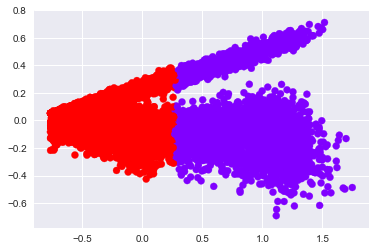

In [46]:
plt.scatter(pc['Starter'], pc['Bottom'], c = k_means.labels_, cmap = 'rainbow')    # 첫 번째 군집이 0번

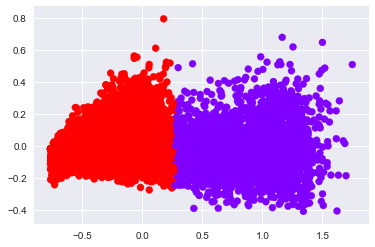

In [47]:
plt.scatter(pc['Starter'], pc['Control'], c = k_means.labels_, cmap = 'rainbow')

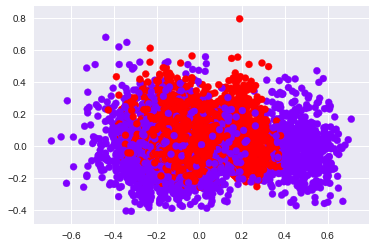

In [48]:
plt.scatter(pc['Bottom'], pc['Control'], c = k_means.labels_, cmap = 'rainbow')

In [49]:
Pitching_numeric_scaled.index = np.arange(Pitching_numeric_scaled.shape[0])
Pitching_numeric_scaled = pd.concat([Pitching_numeric_scaled, pc], axis=1)

#### 타자 분석

In [50]:
for i in range(2, 10) :
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(Batting_numeric_scaled.loc[:, 'R':'ZR'])
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(Batting_numeric_scaled.loc[:, 'R':'ZR'], labels, metric='euclidean'))

0.538269877055
0.427018695167
0.383236046404
0.369876018613
0.328284742767
0.330736746122
0.291962466977
0.272830262615


In [51]:
pca = PCA(n_components=10)
pca.fit(Batting_numeric_scaled.loc[:, 'R':'ZR'])
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3) * 100)
print(cum_var)

[ 66.5  76.7  81.6  85.5  87.9  90.1  92.   93.6  94.8  95.9]


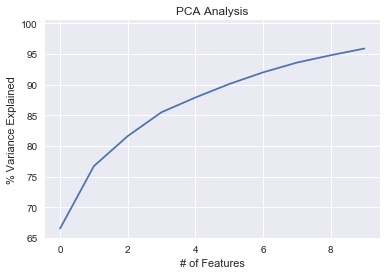

In [52]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(65,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(cum_var)

In [53]:
pca = PCA(n_components=3)
pca.fit(Batting_numeric_scaled.loc[:, 'R':'ZR'])
with pd.option_context('display.max_columns', None):
    display(pd.DataFrame(pca.components_, columns = Batting_numeric_scaled.loc[:, 'R':'ZR'].columns))

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,InnOuts,PO,A,E,DP,ZR
0,0.346227,0.373949,0.339681,0.086947,0.180750,0.310011,0.090307,0.113191,0.157059,0.272165,0.027149,0.107136,0.027903,0.187651,0.253901,0.417998,0.146978,0.151656,0.126142,0.144739,0.001293
1,-0.182920,-0.184007,-0.194730,-0.024354,-0.142045,-0.207597,-0.002302,-0.022202,-0.096659,-0.169233,-0.016286,-0.052042,0.088295,-0.122063,-0.145745,0.578077,0.182869,0.433469,0.271931,0.340648,0.002521
2,0.126954,0.146552,0.061819,0.208233,-0.210879,-0.143344,0.289189,0.330987,-0.023338,-0.024002,-0.037881,0.011071,0.487625,-0.017629,-0.053485,-0.258775,-0.452932,0.365448,0.084865,0.021118,-0.008990


첫 번째 주성분 : 적극적인 타격(출루, 안타, 2루타, 삼진 많음)  
두 번째 주성분 : 수비능력(보살, 더블플레이 많음)  
세 번째 주성분 : 빠른 주루, 외야수(도루 시도 수, 희생타 많음, PO 적음)

In [54]:
pc = pd.DataFrame(pca.transform(Batting_numeric_scaled.loc[:, 'R':'ZR']), columns = ['Hit', 'Defense', 'Run'])

In [55]:
for i in range(2, 10) :
    kmeans_model = KMeans(n_clusters=i, random_state=1).fit(pc)
    labels = kmeans_model.labels_
    print(metrics.silhouette_score(pc, labels, metric='euclidean'))

0.601936378933
0.515542939619
0.45265759612
0.45043981364
0.451933898496
0.418335252114
0.41077850584
0.408776177611


In [56]:
k_means = KMeans(n_clusters=2, n_init=20)
k_means.fit(pc)
print(k_means.cluster_centers_)

[[ -2.67095062e-01   3.41279580e-03  -3.84463065e-04]
 [  7.65924557e-01  -9.78656847e-03   1.10249026e-03]]


첫 번째 군집 : 나머지 타자들  
두 번째 군집 : 타격능력이 뛰어남

In [57]:
pc['clu'] = k_means.labels_

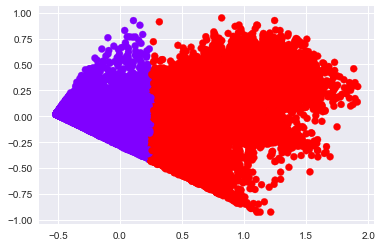

In [58]:
plt.scatter(pc['Hit'], pc['Defense'], c = pc['clu'], cmap = 'rainbow')
plt.show()

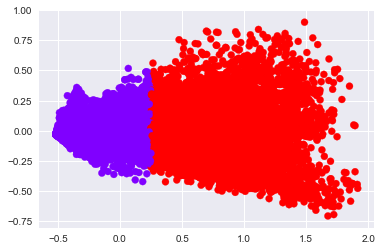

In [59]:
plt.scatter(pc['Hit'], pc['Run'], c = k_means.labels_, cmap = 'rainbow')

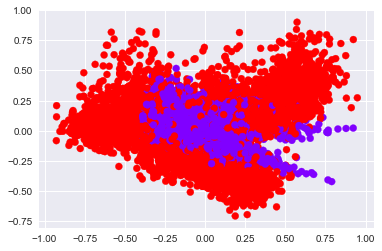

In [60]:
plt.scatter(pc['Defense'], pc['Run'], c = k_means.labels_, cmap = 'rainbow')

In [61]:
Batting_numeric_scaled.index = np.arange(Batting_numeric_scaled.shape[0])
Batting_numeric_scaled = pd.concat([Batting_numeric_scaled, pc], axis=1)

### 한정된 자원으로 팀을 꾸려야 한다면? (야구는 투수 놀음? 타자가 더 중요?)

In [62]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [63]:
Pitching_numeric_scaled.groupby(['teamID', 'yearID'])['salary'].sum().unstack()

yearID,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
teamID,,,,,,,,,,,,,,,,,,,,,
ANA,NaN,NaN,NaN,0.545332,0.656684,0.721596,0.722599,0.332401,0.773347,1.091930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARI,NaN,NaN,NaN,NaN,0.414779,1.103767,1.499443,1.312765,1.833435,1.336242,...,1.361590,1.258188,1.297452,1.204068,0.844517,0.791706,1.223025,1.064987,0.712155,1.743593
ATL,0.622891,0.746114,0.782919,0.790155,1.070931,1.147837,1.119113,1.327597,1.249654,1.432829,...,1.072938,2.015207,1.875640,1.462533,1.155270,0.804901,0.992665,1.069343,1.256750,0.558585
BAL,0.315203,0.571506,0.524779,0.671278,0.997506,0.904839,0.873115,0.576490,0.535522,0.673087,...,0.901953,0.513747,0.723954,0.961068,0.735422,1.221945,1.052289,1.083153,1.536499,2.138800
BOS,0.659195,0.489306,0.450290,0.501710,0.849381,1.232343,1.006476,1.379283,1.597620,1.465588,...,1.534979,1.246139,1.729607,2.124041,2.393279,1.656390,2.851867,2.228634,1.865662,3.032615
CAL,0.343833,0.500672,0.424083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHA,0.359065,0.390320,0.438585,0.556003,0.242103,0.282114,0.544799,0.718981,0.360884,0.619592,...,1.362698,1.689185,1.735855,1.765133,1.924326,1.745934,1.731254,1.435210,2.336192,2.193366
CHN,0.406535,0.306705,0.225046,0.553733,0.685035,0.937551,0.735105,0.774447,0.790652,0.767849,...,1.351879,1.867056,1.851707,2.122374,2.026321,1.378168,2.015592,1.232647,3.167654,3.589825
CIN,0.520386,0.675141,0.612609,0.487519,0.143839,0.519504,0.395610,0.512268,0.704985,0.688628,...,0.966931,0.912256,1.360524,1.308489,1.017313,0.938781,1.610860,1.751923,1.503186,0.907150


In [64]:
Pitching_salaries = pd.DataFrame(Pitching_numeric_scaled.groupby(['teamID', 'yearID'])['salary'].sum().dropna(axis = 0))

In [65]:
Batting_salaries = pd.DataFrame(Batting_numeric_scaled.groupby(['teamID', 'yearID'])['salary'].sum().dropna(axis = 0))

In [66]:
Pitching_salaries.reset_index(inplace=True)
Batting_salaries.reset_index(inplace=True)

In [67]:
Teams_salary = pd.merge(Teams, Pitching_salaries, how = 'left', on = ['teamID', 'yearID'])
Teams_salary = pd.merge(Teams_salary, Batting_salaries, how = 'left', on = ['teamID', 'yearID'])

In [68]:
Teams_salary.columns = ['yearID', 'lgID', 'teamID', 'Rank', 'DivWin', 'attendance', 'salary_Pitcher', 'salary_Hitter']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(Teams_salary[['salary_Pitcher', 'salary_Hitter']], Teams_salary['Rank'], test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((477, 2), (205, 2), (477,), (205,))

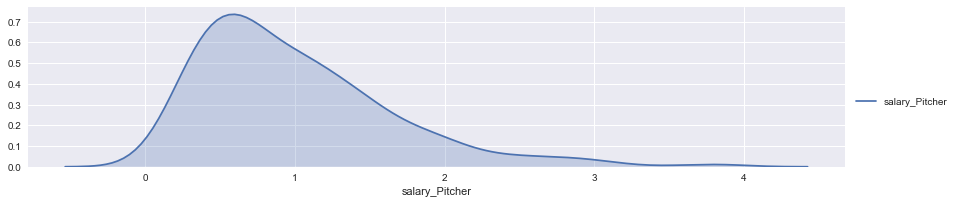

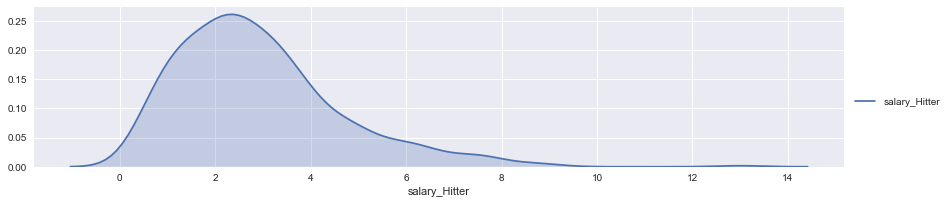

In [175]:
sns.FacetGrid(X_train, aspect = 4).map(sns.kdeplot, 'salary_Pitcher', shade = True).add_legend()
sns.FacetGrid(X_train, aspect = 4).map(sns.kdeplot, 'salary_Hitter', shade = True).add_legend()

In [176]:
reg = linear_model.LinearRegression(fit_intercept = True, normalize = False)
reg.fit(X_train, y_train)
reg.coef_

array([-0.94538065,  0.16375403])

In [177]:
y_true = y_test
y_hat = reg.predict(X_test)
r2_score(y_true, y_hat), mean_squared_error(y_test, reg.predict(X_test))

(0.10160240770960827, 1.9061634673210013)

In [186]:
lasso = linear_model.Lasso(fit_intercept=True, alpha=0.001)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.93508057,  0.16020332])

In [187]:
y_true = y_test
y_hat = lasso.predict(X_test)
r2_score(y_true, y_hat), mean_squared_error(y_test, reg.predict(X_test))

(0.10194869149889285, 1.9061634673210013)

In [166]:
np.corrcoef(Teams_salary['Rank'], Teams_salary['salary_Pitcher'])[0, 1], np.corrcoef(Teams_salary['Rank'], Teams_salary['salary_Hitter'])[0, 1]

(-0.28626854741627583, -0.19513709890712244)

### 특정 선수의 적정 몸값은?

In [73]:
Pitching_numeric_scaled.loc[:, 'IPouts':'GIDP'].drop('GF', axis = 1)

,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,R,SH,SF,GIDP
0,0.590184,0.588028,0.558621,0.500000,0.512,0.241935,0.250,0.042130,0.058824,0.32,0.095238,0.166667,0.627611,0.55000,0.000000,0.000000,0.000
1,0.126380,0.084507,0.089655,0.083333,0.184,0.056452,0.180,0.031574,0.176471,0.04,0.047619,0.000000,0.132607,0.08125,0.000000,0.000000,0.000
2,0.164417,0.200704,0.124138,0.145833,0.080,0.123656,0.290,0.033611,0.176471,0.08,0.000000,0.000000,0.181653,0.14375,0.000000,0.000000,0.000
3,0.595092,0.517606,0.427586,0.333333,0.496,0.290323,0.230,0.031944,0.058824,0.12,0.000000,0.000000,0.618529,0.45000,0.000000,0.000000,0.000
4,0.374233,0.422535,0.406897,0.270833,0.216,0.126344,0.280,0.048333,0.000000,0.20,0.238095,0.833333,0.399637,0.39375,0.000000,0.000000,0.000
5,0.120245,0.116197,0.110345,0.041667,0.120,0.072581,0.250,0.040833,0.176471,0.00,0.000000,0.000000,0.132607,0.12500,0.000000,0.000000,0.000
6,0.570552,0.482394,0.455172,0.229167,0.504,0.389785,0.220,0.035463,0.411765,0.44,0.190476,0.166667,0.592189,0.42500,0.000000,0.000000,0.000
7,0.186503,0.137324,0.144828,0.062500,0.176,0.059140,0.200,0.034537,0.235294,0.08,0.142857,0.000000,0.193460,0.13750,0.000000,0.000000,0.000
8,0.036810,0.031690,0.027586,0.062500,0.016,0.018817,0.230,0.033333,0.000000,0.04,0.000000,0.000000,0.036331,0.02500,0.000000,0.000000,0.000
9,0.305521,0.330986,0.255172,0.187500,0.168,0.166667,0.270,0.037130,0.235294,0.08,0.190476,0.000000,0.326067,0.26250,0.000000,0.000000,0.000


#### 투수 몸값

In [222]:
X_train, X_test, y_train, y_test = train_test_split(Pitching_numeric_scaled.loc[:, 'Starter' : 'Control'], Pitching_numeric_scaled['salary'], test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7229, 3), (3099, 3), (7229,), (3099,))

In [223]:
reg = linear_model.LinearRegression(fit_intercept = True, normalize = False)
reg.fit(X_train, y_train)
reg.coef_

array([ 0.05459394, -0.09461936, -0.09518319])

In [224]:
y_true = y_test
y_hat = reg.predict(X_test)
r2_score(y_true, y_hat), mean_squared_error(y_test, reg.predict(X_test))

(0.10750433990814423, 0.0092798040008782532)

In [225]:
X_train, X_test, y_train, y_test = train_test_split(Pitching_numeric_scaled.loc[:, 'IPouts' : 'GIDP'], Pitching_numeric_scaled['salary'], test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7229, 18), (3099, 18), (7229,), (3099,))

In [226]:
lasso = linear_model.Lasso(alpha=0.0001, max_iter = 100)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.        ,  0.        ,  0.03789191,  0.        , -0.1735014 ,
        0.34765829,  0.01753003, -0.        , -0.09220738, -0.01804123,
       -0.        , -0.02537185,  0.        ,  0.01389818,  0.        ,
        0.05458118,  0.01592834,  0.08774488])

In [227]:
y_true = y_test
y_hat = lasso.predict(X_test)
r2_score(y_true, y_hat), mean_squared_error(y_test, lasso.predict(X_test))

(0.17757882604478137, 0.0091718880817813001)

In [228]:
pd.DataFrame(data = lasso.coef_, index = Pitching_numeric_scaled.loc[:, 'IPouts' : 'GIDP'].columns)

,0
IPouts,0.000000
H,0.000000
ER,0.037892
HR,0.000000
BB,-0.173501
SO,0.347658
BAOpp,0.017530
ERA,-0.000000
IBB,-0.092207
WP,-0.018041


볼넷이 적을수록, 삼진이 많을수록 몸값 상승.... 너무나 당연한 얘기 (볼넷을 적게 허용하는 것 보다는 삼진을 더 많이 잡는 것이 중요)

#### 타자 몸값

Index(['playerID', 'yearID', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'ZR', 'salary', 'Hit', 'Defense',
       'Run', 'clu'],
      dtype='object')

In [235]:
X_train, X_test, y_train, y_test = train_test_split(Batting_numeric_scaled.loc[:, 'R':'ZR'], Batting_numeric_scaled['salary'], test_size = 0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19509, 21), (8361, 21), (19509,), (8361,))

In [244]:
lasso = linear_model.Lasso(alpha=0.0001, max_iter = 100)
lasso.fit(X_train, y_train)
lasso.coef_

array([-0.        ,  0.        , -0.03096771, -0.12651308,  0.15868359,
        0.        ,  0.00751509, -0.12006646,  0.1390742 , -0.04755966,
        0.20274686, -0.00343445,  0.        ,  0.        ,  0.05871441,
        0.13811465, -0.09355116, -0.01671546, -0.12971278,  0.03931877, -0.        ])

In [245]:
y_true = y_test
y_hat = lasso.predict(X_test)
r2_score(y_true, y_hat), mean_squared_error(y_test, lasso.predict(X_test))

(0.13455390915959931, 0.011258954269045976)

In [246]:
pd.DataFrame(data = lasso.coef_, index = Batting_numeric_scaled.loc[:, 'R':'ZR'].columns)

,0
R,-0.000000
H,0.000000
2B,-0.030968
3B,-0.126513
HR,0.158684
RBI,0.000000
SB,0.007515
CS,-0.120066
BB,0.139074
SO,-0.047560


볼넷을 많이 얻을수록, 도루 실패가 적을 수록(도루 성공과는 관계없음), 홈런이 많고 출루가 많을 수록 몸값이 비쌈(홈런보다는 출루율이 더 중요)